In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("E:/911.csv")
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## understanding data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


#### there are 423909 observation and 11 features

#### 1)remove null values
#### 2)drop dummy variable
#### 3)change the datatype of timestamp 

In [4]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          52129
title            0
timeStamp        0
twp            159
addr             0
e                0
dtype: int64

#### we can see there are  null values in zip and twp as they are below 10% of whole as of now we can drop them

In [5]:
df1=df.dropna(axis=0)
df1.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

In [6]:
df1.describe()

,lat,lng,zip,e
count,371711.000000,371711.000000,371711.000000,371711.0
mean,40.160485,-75.315224,19234.743118,1.0
std,0.093353,0.238038,301.371813,0.0
min,30.333596,-95.595595,3366.000000,1.0
25%,40.102256,-75.398953,19038.000000,1.0
50%,40.145223,-75.302071,19401.000000,1.0
75%,40.232077,-75.206303,19446.000000,1.0
max,51.335390,-0.742856,77316.000000,1.0


#### all the numerical values are following normal distribution with sfew outliers

#### we can see variable 'e' is a dummy it is storing only 1 value so we can drop

In [7]:
df1.drop('e',axis=1,inplace=True)

In [8]:
#### converting data type of timestamp

df1['timeStamp'] = pd.to_datetime(df1['timeStamp'])

## creating new varibales basing on title column

In [9]:
x=df1['title'].str.split(':', n = 1, expand = True)
x.head()

,0,1
0,EMS,BACK PAINS/INJURY
1,EMS,DIABETIC EMERGENCY
2,Fire,GAS-ODOR/LEAK
3,EMS,CARDIAC EMERGENCY
5,EMS,HEAD INJURY


In [10]:
df1['type']=x[0]
df1['subtype']=x[1]

In [11]:
df1['type'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [12]:
df1['subtype'].unique()

array([' BACK PAINS/INJURY', ' DIABETIC EMERGENCY', ' GAS-ODOR/LEAK',
       ' CARDIAC EMERGENCY', ' HEAD INJURY', ' NAUSEA/VOMITING',
       ' RESPIRATORY EMERGENCY', ' SYNCOPAL EPISODE',
       ' VEHICLE ACCIDENT -', ' DIZZINESS', ' VEHICLE ACCIDENT',
       ' DISABLED VEHICLE -', ' APPLIANCE FIRE', ' GENERAL WEAKNESS',
       ' CARBON MONOXIDE DETECTOR', ' UNKNOWN MEDICAL EMERGENCY',
       ' UNRESPONSIVE SUBJECT', ' CVA/STROKE', ' FIRE ALARM',
       ' ROAD OBSTRUCTION -', ' SUBJECT IN PAIN', ' HEMORRHAGING',
       ' FALL VICTIM', ' ASSAULT VICTIM', ' SEIZURES',
       ' MEDICAL ALERT ALARM', ' ABDOMINAL PAINS', ' PUMP DETAIL',
       ' FIRE INVESTIGATION', ' OVERDOSE', ' MATERNITY',
       ' UNCONSCIOUS SUBJECT', ' CHOKING', ' LACERATIONS',
       ' TRASH/DUMPSTER FIRE', ' UNKNOWN TYPE FIRE', ' BUILDING FIRE',
       ' ELECTRICAL FIRE OUTSIDE', ' DEBRIS/FLUIDS ON HIGHWAY',
       ' DEBRIS/FLUIDS ON HIGHWAY -', ' FEVER', ' ALLERGIC REACTION',
       ' FRACTURE', ' RESCUE - GENERAL

#### we can see in title there are type and sub type of emergency so i have separated them and created two new columns.

# How many different types of calls.

In [13]:
df1.shape

(371711, 10)

### totally there are 371711 different calls are there in the dataset after cleaning. further,we can see the calls of each emergency type and subtype and w.r.t time and dat.

# no.of calls based on emergency type

EMS        190278
Traffic    125370
Fire        56063
Name: type, dtype: int64


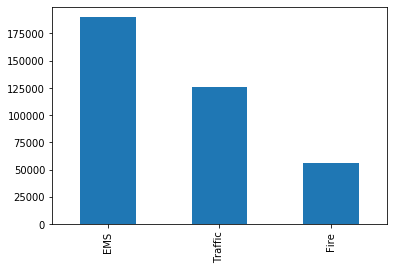

In [14]:
print(df1['type'].value_counts())
df1['type'].value_counts().plot.bar()

In [15]:
#### EMS has recorder highest number of calls and fire has the least.

In [16]:
from datetime import datetime
import datetime as dt
date=pd.to_datetime(df1['timeStamp']).dt.date
time=pd.to_datetime(df1['timeStamp']).dt.time

# Extract the date and time regarding the calls

In [17]:
df1["year"] = df1["timeStamp"].apply(lambda x: x.year)

df1["month"] = df1["timeStamp"].apply(lambda x: x.month)

df1["date"] = df1["timeStamp"].apply(lambda x: x.date())

df1["day of week"] = df1["timeStamp"].apply(lambda x : x.dayofweek)

df1["time"] = df1["timeStamp"].apply(lambda x : x.time())

In [18]:
# Mapping day of week (numberic) column into categorical:
dow = {0:"Mon", 1:"Tues", 2:"Wed", 3:"Thurs" , 4:"Fri", 5:"Sat", 6:"Sun" }

df1["Day of Week"] = df1["day of week"].map(dow)

# At what time of day/month I can expect which type of call.

# yearly

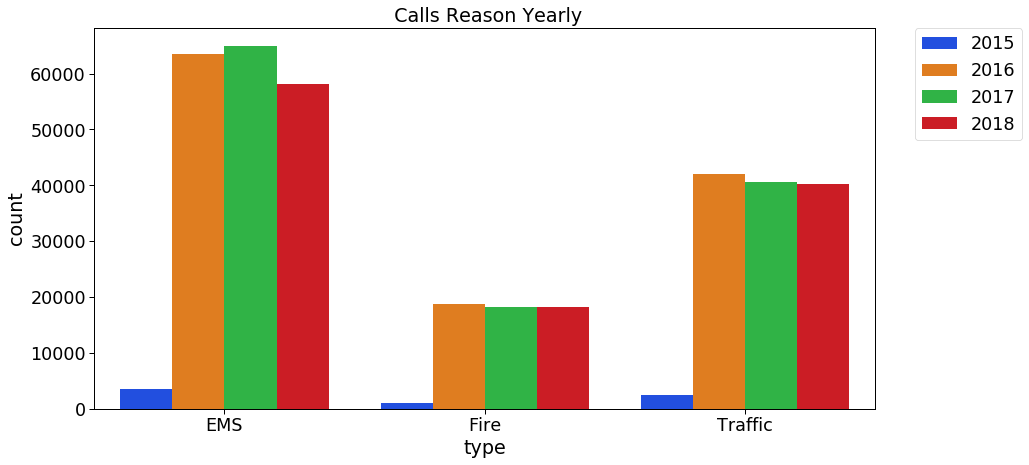

In [19]:
plt.figure(figsize=(14,7))
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "type", data= df1, palette="bright" ,hue= "year")
plt.title(" Calls Reason Yearly")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

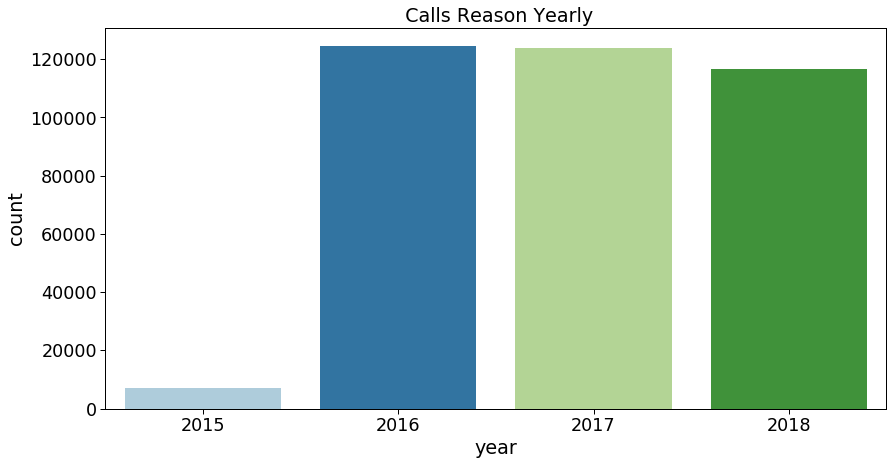

In [20]:
# Plot for calls recieved yearly:
plt.figure(figsize=(14,7))
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "year", data= df1, palette="Paired")
plt.title(" Calls Reason Yearly")
plt.show()

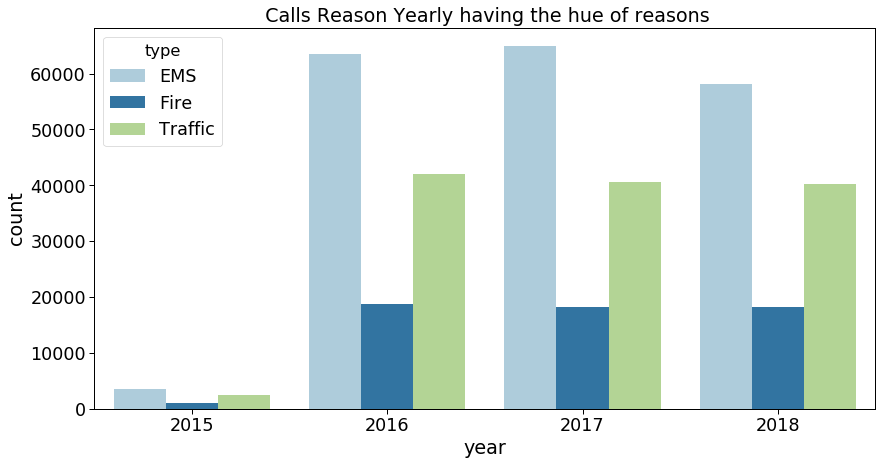

In [21]:
plt.figure(figsize=(14,7))
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "year", data= df1, palette="Paired", hue = "type")
plt.title(" Calls Reason Yearly having the hue of reasons")
plt.show()

In [22]:
### we can see in 2015 least number of calls are recorded

### in every year highest number of emergency calls are related to EMS and then 

# monthly

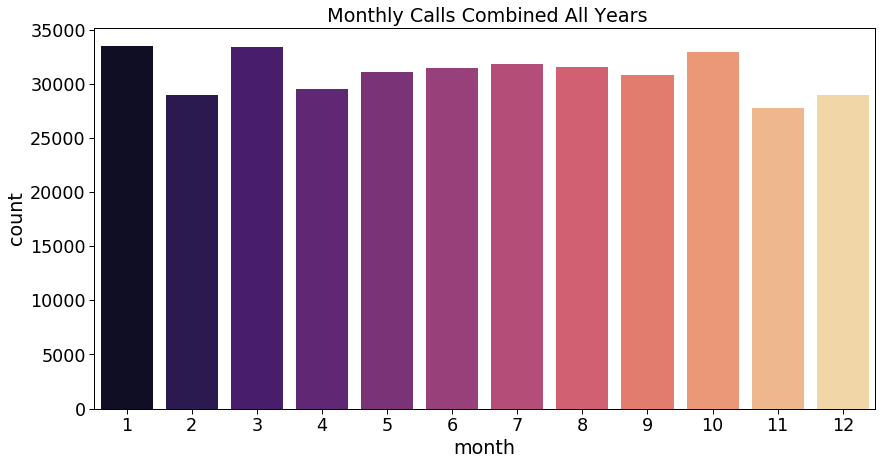

In [23]:
# Plot for calls recieved monthly combined of all years:
plt.figure(figsize=(14,7))

sns.set_context("paper", font_scale = 2)
sns.countplot(x= "month", data= df1, palette="magma")

plt.title(" Monthly Calls Combined All Years")
plt.show()


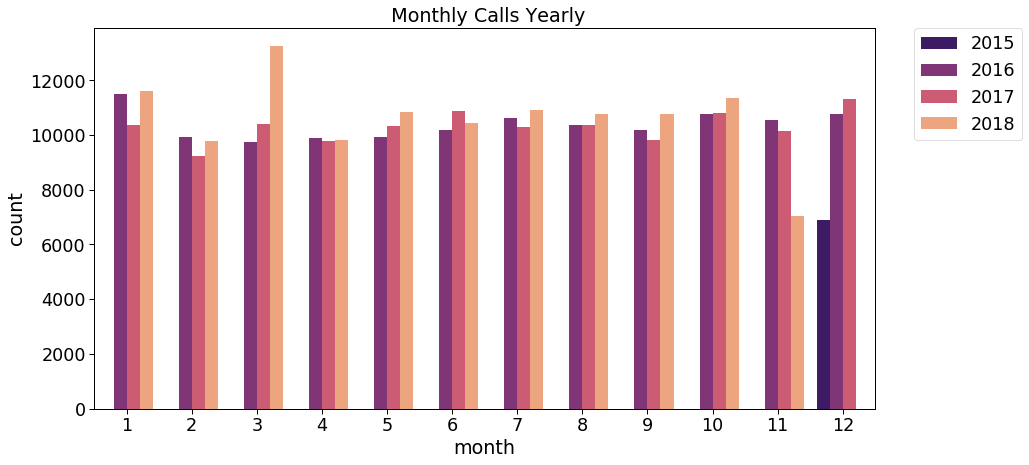

In [24]:
plt.figure(figsize = (14,7))

sns.set_context("paper", font_scale=2)
sns.countplot(data= df1, x= "month", hue= "year", palette="magma")

plt.title(" Monthly Calls Yearly")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

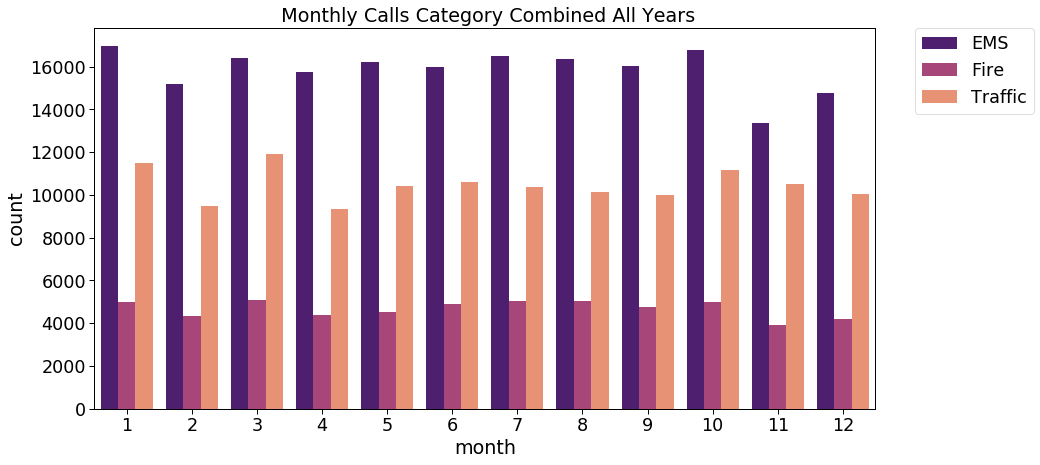

In [25]:
plt.figure(figsize=(14,7))
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "month", data= df1, palette="magma", hue= "type")
plt.title(" Monthly Calls Category Combined All Years")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# week of the day

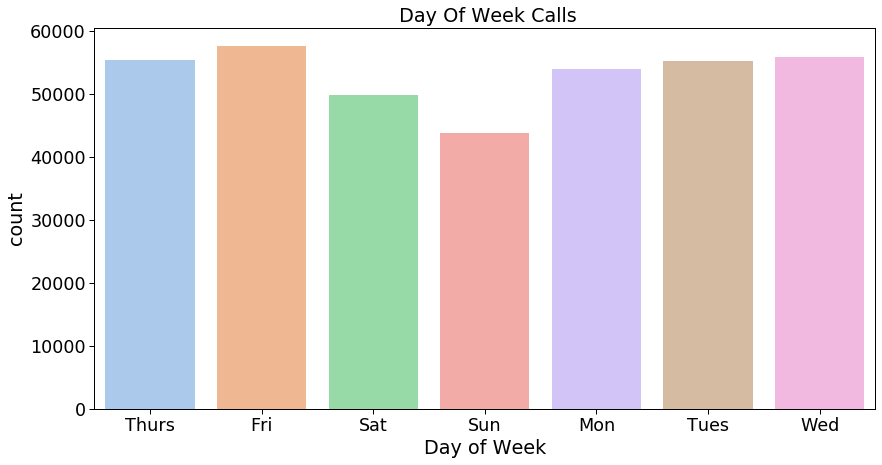

In [26]:
# Calls report Daily: 

plt.figure(figsize=(14,7))
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "Day of Week", data= df1, palette="pastel")
plt.title(" Day Of Week Calls")
plt.show()

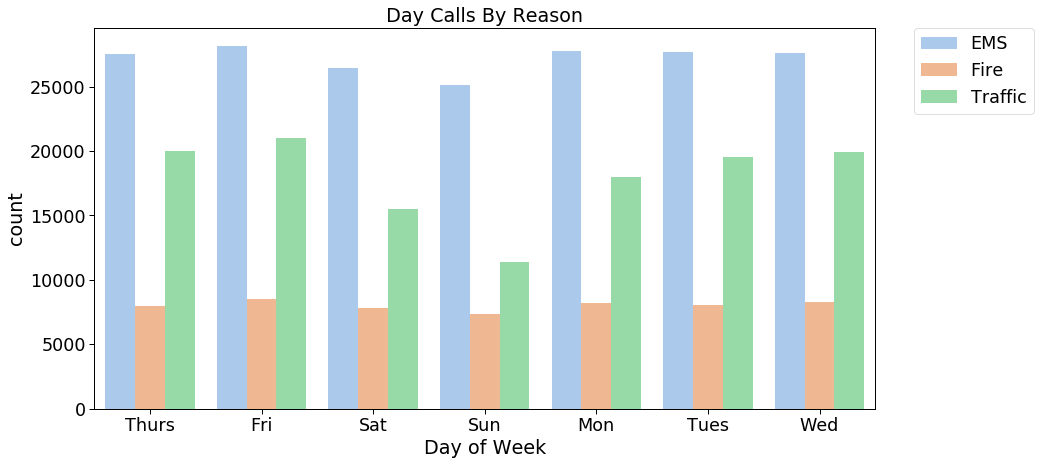

In [27]:
plt.figure(figsize=(14,7))
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "Day of Week", data= df1, palette="pastel", hue= ("type") )     
plt.title(" Day Calls By Reason ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

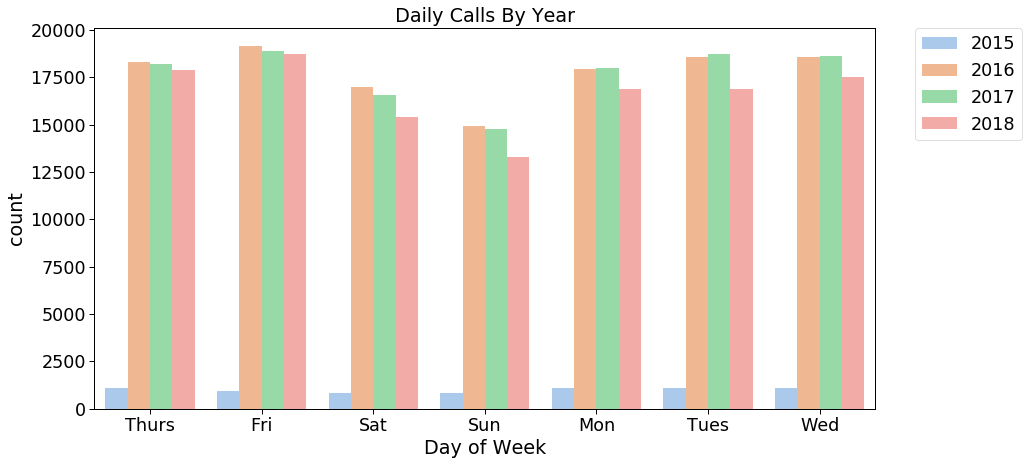

In [28]:
plt.figure(figsize=(14,7))
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "Day of Week", data= df1, palette="pastel", hue= "year" )     
plt.title(" Daily Calls By Year ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Visualize the percentage share of emergency type for each call.

# percentage share of emergency type

EMS        51.189768
Traffic    33.727815
Fire       15.082416
Name: type, dtype: float64


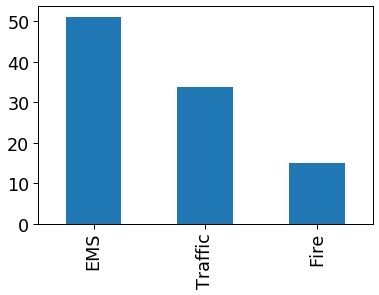

In [29]:
print((df1['type'].value_counts()/len(df1['type']))*100)
per=df1['type'].value_counts()/len(df1['type'])*100
per.plot.bar()

## On any day there is 50% chance there will be emergency call related to EMS.
## On friday there is high chance of Emercency calls related to traffic.
## There is a constant 15% chances that there will be emergency call related to fire on any day of the week.
## even the emergency calls are decreased compared to last 2 years .
## january and march recorded highest emergency calls.